In [1]:
import sys
sys.path.insert(0, "./src")

In [2]:
from datasets.dataset import SummingDataset
dataset = SummingDataset(seq_len=12, vector_size=4)
X, y = dataset.train_data

In [3]:
from LSTM.LSTM import LSTM
model = LSTM(4, 12, 4, "last")

In [ ]:
model.train(X, y, 0.025, 64, 100)

Training ... (l: 1038.3027):  37%|███████████████████████████████████████████▊                                                                           | 2876/7813 [00:19<00:33, 148.05it/s]

In [1]:
import sys
sys.path.insert(0, "./src")

import numpy as np
import torch
from tqdm import tqdm
from src.LSTM.regressor import Regressor
from src.LSTM.LSTMCell import LSTMCell
from src.LSTM.utils import mse_loss, mse_loss_d, sigmoid_d, tanh_d

In [3]:
# Initiazte here just to reset the model states
cell = LSTMCell(32, 48)
regressor = Regressor(48, 12)

In [ ]:
from tqdm import tqdm
epochs = 1000
batch = 128

losses = []
pbar = tqdm(range(epochs), desc=f'Training ... loss: {0.0}')

for epoch in pbar:
    for i in range(0, X.shape[0], batch):
        x = X[i:i+batch]
        y_gt = y[i:i+batch].unsqueeze(1)
        hidden_states = cell.forward(x)
        # Obtain the last hidden states to be fed to the regressor
        last_hidden_states = hidden_states[:, -1, :]
        y_pred = regressor.forward(last_hidden_states)

        # Calculate losses
        loss = mse_loss(y_gt, y_pred)
        loss_d = mse_loss_d(y_gt, y_pred)

        # Backward
        chained_d = regressor.backward(loss_d, 0.025)
        # Now it goes (sequence_len, batch_size, vector_size)
        chained_ds = torch.zeros((x.shape[1], *chained_d.shape))
        chained_ds[-1] = chained_d
        chained_ds = chained_ds.transpose(1,0)
        
        c_state_d, h_state_d, input_d = cell.backward(chained_ds, 0.015)
    
        losses.append(loss.item())
    
        if ((i/batch) % 10) == 9:
            pbar.set_description(f'Training ... loss: {sum(losses[-64:]) / len(losses[-64:])}')


    

Training ... loss: 554977.6948242188:  56%|███████████████████████████████████████████████████████████████▎                                                | 565/1000 [33:30<24:27,  3.37s/it]

In [22]:
l = torch.Tensor(losses)
ll = l[~torch.isnan(l)]
print(torch.isnan(l).sum())
print(len(ll))

tensor(0)
1570


In [6]:
loss_d.shape

torch.Size([128, 1])

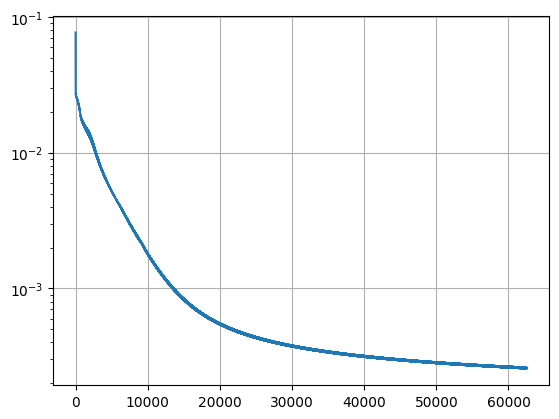

In [11]:
import matplotlib.pyplot as plt
plt.grid()
plt.yscale('log')
plt.plot(ll)

In [11]:
losses

[1.458042025566101,
 1.4502004384994507,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,

In [6]:
out = cell.forward(x, use_grads=False)
out_y = regressor.forward(out, require_grads=False)

TypeError: LSTMcell.forward() got an unexpected keyword argument 'use_grads'

In [ ]:
out_y.squeeze(1)

In [ ]:
x.squeeze(1)

In [5]:
X.shape

torch.Size([16000, 10, 1])

In [7]:
torch.arange(100)[-64:].shape

torch.Size([64])

In [13]:
torch.linspace(0, 1, 101)[50]

tensor(0.5000)

In [12]:
sum(torch.round(torch.linspace(0, 1, 101)) == 1)

tensor(50)

In [17]:
torch.zeros((3,2)).tile(2,1,1).shape

torch.Size([2, 3, 2])

In [19]:
list(torch.zeros((2,3)))

[tensor([0., 0., 0.]), tensor([0., 0., 0.])]

In [20]:
type(torch.float32)

torch.dtype

In [22]:
class X:
    pass
class Y(X):
    def __init__(self):
        import pdb; pdb.set_trace()
        x = 1

In [23]:
Y()

> /tmp/ipykernel_76688/4133433247.py(6)__init__()
      2     pass
      3 class Y(X):
      4     def __init__(self):
      5         import pdb; pdb.set_trace()
----> 6         x = 1



ipdb>  self


ipdb>  self.super


*** AttributeError: 'Y' object has no attribute 'super'


ipdb>  super(self)


*** TypeError: super() argument 1 must be type, not Y


ipdb>  super(self.__class__)


<super: <class 'Y'>, NULL>


ipdb>  self.__class__


<class '__main__.Y'>
--KeyboardInterrupt--

KeyboardInterrupt: Interrupted by user
